In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from scipy.signal import find_peaks

import cv2 as cv

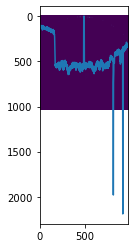

In [3]:
img = Image.open(r"C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff")
#for the image you just insert the file path. On Windows 10 this is found by left clicking once on an image and then going above it and finding where it says "copy path"
#take the path and insert it (with the quotations included) after r into the Image.open(r) function
#so like "Image.open(r"C:\filename")
img1 = img.convert('I') # 'I' : 32-bit integer pixels
img1.show()

data = ( np.copy( np.asarray(img1) ) ).astype(float) #I am unsure what data is actually getting and what the peaks are
plt.imshow(data)
plt.plot(data[0,:])

In [4]:
smallest_num=2.2250738585072014*10**(-306) #2.2250738585072014*10**(-308) is the smallest positive number in python by I will just increase this number by 100 times. 
#I don't want for the logarithm to have issue computing with a number so close to the minnimum.
data_log = np.log10(data+2+smallest_num) #np.min(img)=-2 so the lowest data point in the image (the 2d array representing the image values) is -2. 
#log base 10 has domain: x>0 for x in R so we want to add over 2 in order to plot. 
#I will go as close to 2 as possbile to minnimize the amount the graph is transformed from the orginal 
#(which we had certain values we couldn't plot so the whole thing wouldn't plot).

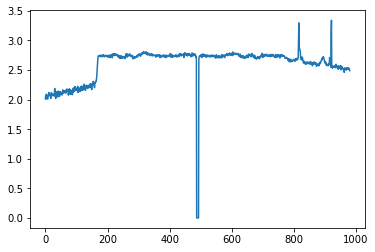

In [5]:
plt.plot(data_log[0,:])

In [6]:
img2 = np.asarray(Image.open("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff"))
# for numpy version of file all backslashes turned in forward slashes. Also no "r" and C: as shown in cell 1.

In [12]:
print(img2) #Each inner list represents a row.
#repr() just gives a printable version of the object (the img2 array in this case)
print()
print("array size (row amount): "+str(len(img2))+" (column amount): "+str(len(img2[0]))) #len(img2[0]) used since it is rectangular
#amount of arrays in the 2D array- which should tell us the row number. The column number is also given. Basically the dimensions of our image.
#negative value are the missing parts of the image which have no intensity value. Also the image being put on my computer can slightly corrupt it so it makes more gaps and thus more negative values.

[[102 116 100 ... 322 314 306]
 [106 104 120 ... 343 331 307]
 [ 95 124 107 ... 383 334 281]
 ...
 [ -2  -2  -2 ... 153 188 176]
 [ -2  -2  -2 ... 160 159 161]
 [ -2  -2  -2 ... 182 147 155]]

array size (row amount): 1043 (column amount): 981


In [13]:
print(img2[0]) #gives intensity (photon amount like light sensor) at each pixel in the top row [0] is top row of image. The frequency is the physical interpretation of this, but the computer just gives us a number to represent intensity.
#Each pixel has one value and each row of array corresponds to each literal row across in an image

[ 102  116  100  121  120  115  114  100  110  113  117  130  115  118
  116  115  119  102  121  129  125  120  122  116  114  117  115  121
  116  125  152  112  136  102  111  129  112  133  134  125  109  137
  123  126  135  111  118  134  127  120  130  125  124  117  123  131
  144  128  129  127  132  138  133  129  138  142  127  131  136  149
  143  146  140  139  117  135  148  132  149  137  121  134  143  124
  123  129  120  119  147  130  155  147  135  155  154  164  144  140
  156  144  145  150  140  149  166  130  139  155  150  153  135  138
  135  158  161  140  167  153  146  165  141  144  149  169  148  180
  153  146  156  142  165  162  173  163  166  153  153  167  156  172
  166  163  160  178  157  184  163  171  177  145  182  183  179  176
  201  178  187  184  157  187  186  197  200  198  217  233  287  340
  430  503  543  544  546  538  547  556  528  557  539  561  547  532
  529  527  555  537  572  536  546  548  527  536  562  547  548  548
  537 

Max value is: 19746
Index of max value is: 676


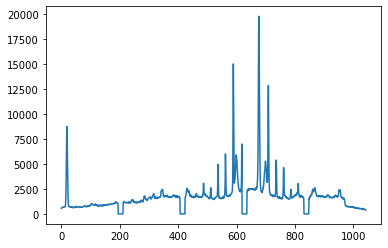

In [22]:
plt.plot(img2[:,500]) #500th column of the array
#np.argmax(img2[:,500])
ii=np.argmax(img2[:,500])
ii #index of the max value in the 500th column of the array
maxval=img2[ii,500] #the peak value
print("Max value is: "+str(maxval)+"\nIndex of max value is: "+str(ii))


In [23]:
x=img2[:,500]
a=x>7500 #tells you if the values are above this number. True or false so boolean.
a

array([False, False, False, ..., False, False, False])

In [16]:
#colormaps next for clear visual

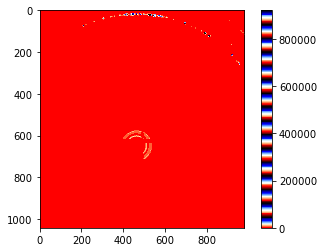

In [17]:
plt.imshow(img2, cmap="flag")
plt.colorbar() #the colorbar on the side has little meaning since the colors aren't dependent on scalar values of the image brightness. As shown on the bar, the same colors are repeated many times, so you can't tell their strength

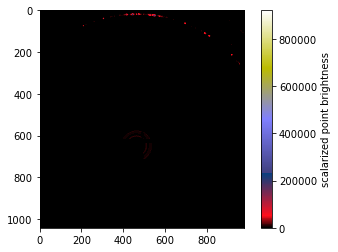

In [18]:
plt.imshow(img2, cmap="gist_stern")
plt.colorbar(label="scalarized point brightness") #tells you the "strength" of the image at this point 